model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 16 files:   0%|          | 0/16 [00:00<?, ?it/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/313 [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/592 [00:00<?, ?B/s]

(…)kpoints/scheduler_config-checkpoint.json:   0%|          | 0.00/209 [00:00<?, ?B/s]

safety_checker/config.json:   0%|          | 0.00/4.56k [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/551 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

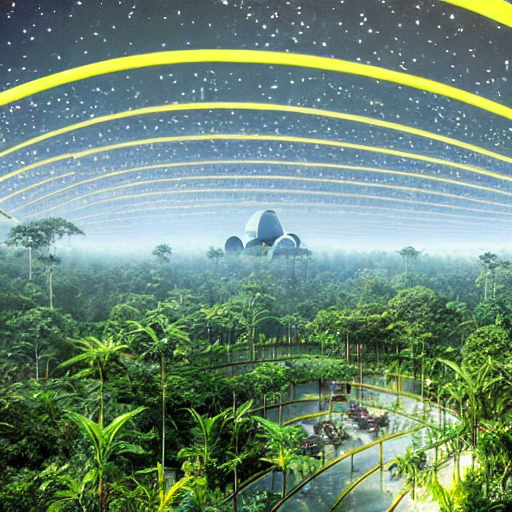

In [2]:
from diffusers import DiffusionPipeline

pipe = DiffusionPipeline.from_pretrained("CompVis/stable-diffusion-v1-4")

prompt = "A high tech solarpunk utopia in the Amazon rainforest"
pipe = pipe.to("cuda")
image = pipe(prompt).images[0]
image

Public URL: https://2358-34-125-105-145.ngrok-free.app


INFO:     Started server process [1359]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     Uvicorn running on http://127.0.0.1:8000 (Press CTRL+C to quit)


INFO:     2407:5200:405:6c58:d516:d004:c6f5:d612:0 - "GET / HTTP/1.1" 404 Not Found
INFO:     2407:5200:405:6c58:d516:d004:c6f5:d612:0 - "GET /favicon.ico HTTP/1.1" 404 Not Found
INFO:     2407:5200:405:6c58:d516:d004:c6f5:d612:0 - "GET /docs HTTP/1.1" 200 OK
INFO:     2407:5200:405:6c58:d516:d004:c6f5:d612:0 - "GET /openapi.json HTTP/1.1" 200 OK


  0%|          | 0/50 [00:00<?, ?it/s]

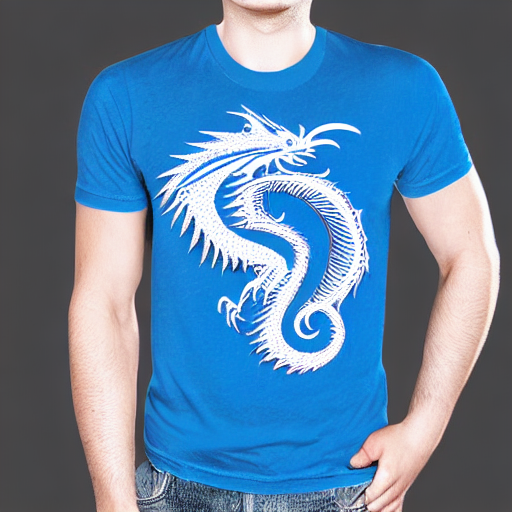

INFO:     2407:5200:405:6c58:d516:d004:c6f5:d612:0 - "POST /gen_design HTTP/1.1" 200 OK


  0%|          | 0/50 [00:00<?, ?it/s]

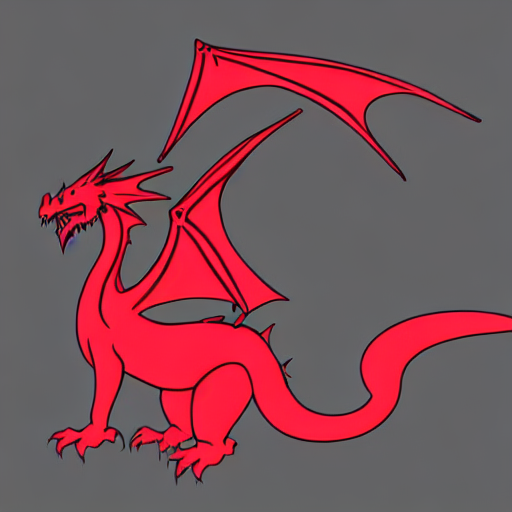

INFO:     2407:5200:405:6c58:d516:d004:c6f5:d612:0 - "POST /gen_design HTTP/1.1" 200 OK


  0%|          | 0/50 [00:00<?, ?it/s]

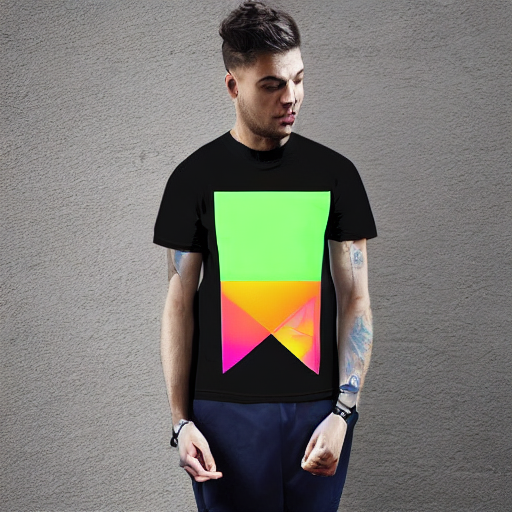

INFO:     2407:5200:405:6c58:d516:d004:c6f5:d612:0 - "POST /gen_design HTTP/1.1" 200 OK


  0%|          | 0/50 [00:00<?, ?it/s]

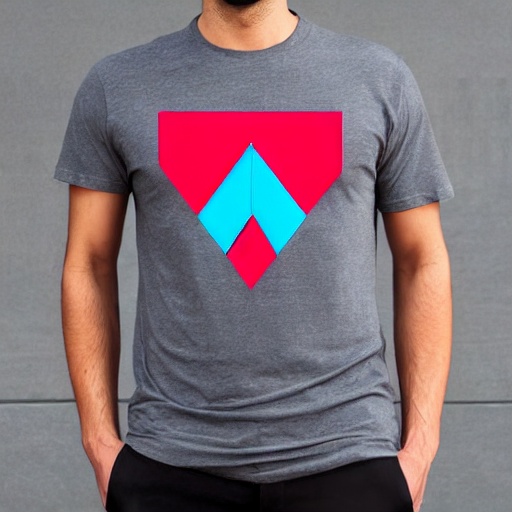

INFO:     45.123.223.190:0 - "POST /gen_design HTTP/1.1" 200 OK


In [ ]:
from fastapi import FastAPI
from pydantic import BaseModel
from typing import Optional
import uvicorn
from pyngrok import ngrok
from fastapi.middleware.cors import CORSMiddleware
import nest_asyncio
import os
import cloudinary
import cloudinary.uploader

cloudinary.config(
    cloud_name = "dbhckg5el",
    api_key = "592613464587995",
    api_secret = "uk1Ackb_FnPqLbX12ojf65Izct8", # Click 'View API Keys' above to copy your API secret
    secure=True
)

app = FastAPI()
origins = ["*"]

app.add_middleware(
    CORSMiddleware,
    allow_origins=origins,
    allow_credentials=True,
    allow_methods=["*"],
    allow_headers=["*"],
)

class InputPrompts(BaseModel):
    prompt: str
    negative_prompt: str



@app.post("/gen_design")
def do_generate_design(request:InputPrompts):
    prompt = request.prompt
    negative_prompt = request.negative_prompt
    image = pipe(pr).images[0]
    display(image)
    image.save(f"out.jpg")
    response = cloudinary.uploader.upload(
                    "out.jpg",
                    folder="test",
                    use_filename=False,
                    unique_filename=True
                )

    return {"cloudinary_urls": response['secure_url']}




os.environ["NGROK_AUTHTOKEN"] = "2ou2c1Bii8BIoxgpVvLbyrGRrhq_39atbrbFQZoZsf6o7MYsQ"
ngrok_tunnel = ngrok.connect(8000)
print('Public URL:', ngrok_tunnel.public_url)
nest_asyncio.apply()
uvicorn.run(app, port=8000)

In [6]:
import cloudinary
import cloudinary.uploader
from cloudinary.utils import cloudinary_url

# Configuration
cloudinary.config(
    cloud_name = "dbhckg5el",
    api_key = "592613464587995",
    api_secret = "uk1Ackb_FnPqLbX12ojf65Izct8", # Click 'View API Keys' above to copy your API secret
    secure=True
)

# Upload an image
upload_result = cloudinary.uploader.upload("https://res.cloudinary.com/demo/image/upload/getting-started/shoes.jpg",
                                           public_id="shoes")
print(upload_result["secure_url"])

# Optimize delivery by resizing and applying auto-format and auto-quality
optimize_url, _ = cloudinary_url("shoes", fetch_format="auto", quality="auto")
print(optimize_url)

# Transform the image: auto-crop to square aspect_ratio
auto_crop_url, _ = cloudinary_url("shoes", width=500, height=500, crop="auto", gravity="auto")
print(auto_crop_url)

https://res.cloudinary.com/dbhckg5el/image/upload/v1732516371/shoes.jpg
https://res.cloudinary.com/dbhckg5el/image/upload/f_auto,q_auto/shoes
https://res.cloudinary.com/dbhckg5el/image/upload/c_auto,g_auto,h_500,w_500/shoes
